In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_excel("amazon_orders_data.xlsx")
data.head()

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer


In [3]:
data.shape

(171, 12)

<AxesSubplot:>

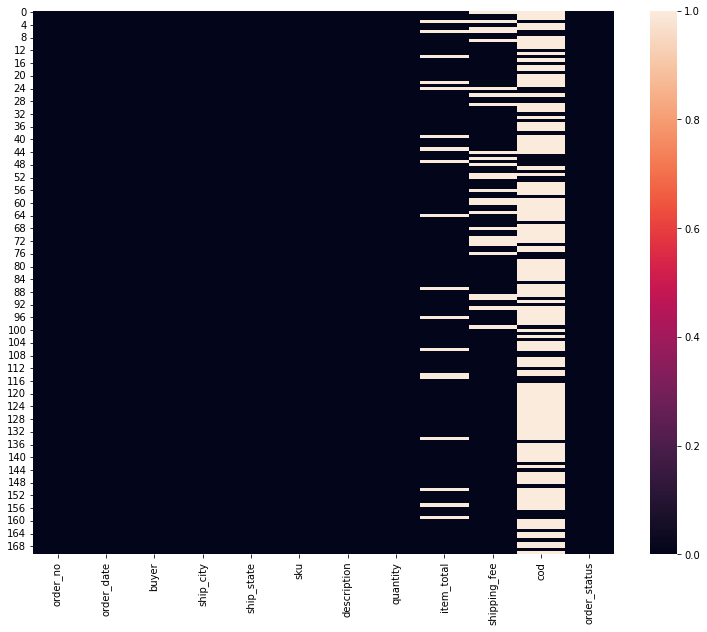

In [4]:
plt.figure(figsize=(13, 10))
sns.heatmap(data.isnull())

In [5]:
data.isnull().sum() / data.shape[0] * 100

order_no         0.000000
order_date       0.000000
buyer            0.000000
ship_city        0.000000
ship_state       0.000000
sku              0.000000
description      0.000000
quantity         0.000000
item_total      10.526316
shipping_fee    15.204678
cod             72.514620
order_status     0.000000
dtype: float64

In [6]:
data[data['item_total'].isnull()][:2]

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
6,404-5794317-7737924,"Thu, 12 Aug, 2021, 8:03 pm IST",shailendra,"ORAI,",UTTAR PRADESH,SKU: TQ-OE6K-9DIK,Ultra Slim 100% Pure Leather Men's Wallet with...,1,NaN,NaN,Cash On Delivery,Returned to seller


In [7]:
data[data['sku'].str.contains("AH-J3AO-R7DN")]
# need to impute missing values for item total if there is another sku in dataset that has pricing 

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
26,405-0695973-7365161,"Thu, 22 Jul, 2021, 9:32 am IST",Sailaja,"VISAKHAPATNAM,",ANDHRA PRADESH,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,₹250.00,NaN,NaN,Delivered to buyer


In [8]:
data[data.cod.isnull()][:3]

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer


In [37]:
data['cod'].value_counts()

Cash On Delivery    47
Name: cod, dtype: int64

In [38]:
data['cod'] = data['cod'].fillna("Online Payment")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_no      171 non-null    object
 1   order_date    171 non-null    object
 2   buyer         171 non-null    object
 3   ship_city     171 non-null    object
 4   ship_state    171 non-null    object
 5   sku           171 non-null    object
 6   description   171 non-null    object
 7   quantity      171 non-null    int64 
 8   item_total    153 non-null    object
 9   shipping_fee  145 non-null    object
 10  cod           47 non-null     object
 11  order_status  171 non-null    object
dtypes: int64(1), object(11)
memory usage: 16.2+ KB


In [10]:
data["shipping_fee"].fillna(data.shipping_fee.mode()[0], inplace=True)
data["shipping_fee"] = data["shipping_fee"].apply(lambda x: x.replace("₹", ""))

In [11]:
data['item_total'].isnull().sum()
data["item_total"].fillna(data.item_total.mode()[0], inplace=True)
data["item_total"] = data["item_total"].apply(lambda x: x.replace("₹", ""))
data["item_total"] = data["item_total"].apply(lambda x: x.replace(",", ""))

In [12]:
data[["item_total", "shipping_fee"]] = data[["item_total", "shipping_fee"]].astype('float64')

0.0

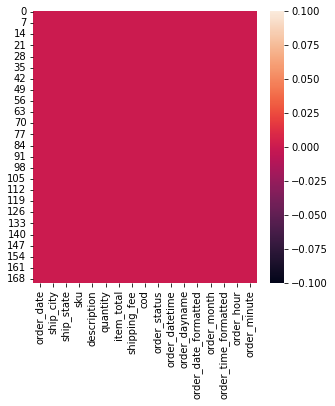

In [39]:
plt.figure(figsize=(5, 5))
sns.heatmap(data.isnull())
data['cod'].isnull().sum() / data.shape[0] * 100 #nearly 3/4 of CODs are missing from the dataset; going to drop them

In [14]:
# data = data.drop(labels='cod', axis=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_no      171 non-null    object 
 1   order_date    171 non-null    object 
 2   buyer         171 non-null    object 
 3   ship_city     171 non-null    object 
 4   ship_state    171 non-null    object 
 5   sku           171 non-null    object 
 6   description   171 non-null    object 
 7   quantity      171 non-null    int64  
 8   item_total    171 non-null    float64
 9   shipping_fee  171 non-null    float64
 10  cod           47 non-null     object 
 11  order_status  171 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 16.2+ KB


In [16]:
# def get_date_format(row): 
#     date_list = [] 
#     year = row.split(",", "")[2]
#     date = row.split(",", "")[1]
#     full_formatted_date = str(date) + str(year)
#     date_list.append(full_formatted_date)
#     return date_list

In [17]:
# need function to pull correct date string for datetime formatting 
# data['order_date_formatted'] = data['order_date'].apply(lambda x: get_date_format(x))

c:\users\ana jones\pycharmprojects\jupyter\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='order_status', ylabel='count'>

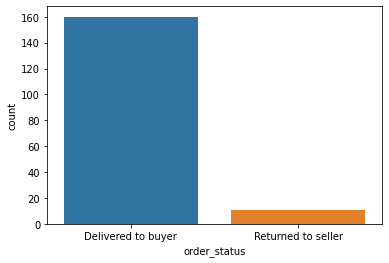

In [18]:
sns.countplot(data.order_status)
# disproportionate number of deliverys to returns; could bias algorithm if not accounted for 
# if returned to seller is a truly rare event, then can be left alone

In [19]:
data.isnull().sum().sum()

124

In [20]:
data.duplicated().sum()

0

In [21]:
data.head(2)

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,84.96,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,NaN,Delivered to buyer


In [22]:
for col in data.columns: 
    print(col, data[col].nunique(), "unique values")

order_no 171 unique values
order_date 171 unique values
buyer 149 unique values
ship_city 81 unique values
ship_state 30 unique values
sku 54 unique values
description 61 unique values
quantity 4 unique values
item_total 18 unique values
shipping_fee 13 unique values
cod 1 unique values
order_status 2 unique values


In [23]:
#some things are "too unique" to play any role in regression classification, so we can drop those 
data = data.drop(labels=["order_no", "buyer"], axis=1)

In [24]:
data['ship_city'].value_counts()

MUMBAI,           17
BENGALURU,        15
KOLKATA,          11
HYDERABAD,         9
CHENNAI,           7
                  ..
JALANDHAR,         1
THISAYANVILAI,     1
BIDHAN NAGAR,      1
New Delhi,         1
Durg,              1
Name: ship_city, Length: 81, dtype: int64

In [25]:
data['ship_state'] = data['ship_state'].apply(lambda x: x.replace(",", ""))
data['ship_city'] = data['ship_city'].apply(lambda x: x.replace(",", ""))

In [26]:
data['order_datetime'] = data['order_date'].apply(lambda x: x[4:])

In [27]:
data['order_dayname'] = data['order_date'].apply(lambda x: x[:3])

In [28]:
data['order_date_formatted'] = pd.DatetimeIndex(data['order_date']).date
data['order_date_formatted'] = pd.to_datetime(data['order_date_formatted']) 
data['order_month'] = data['order_date_formatted'].dt.month_name()
data['order_time_formatted'] = pd.DatetimeIndex(data['order_date']).time
data['order_time_formatted'] = pd.to_datetime(data['order_time_formatted'], format="%H:%M:%S")
data['order_time_formatted'] = data['order_time_formatted'].dt.strftime("%H:%M:%S")

# data['order_hour_24'] = data['order_time_formatted'].apply(lambda x: x.str.split(":")[0])

c:\users\ana jones\pycharmprojects\jupyter\venv\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [29]:
data['order_hour'] = data['order_time_formatted'].apply(lambda x: x.split(":")[0])
data['order_minute'] = data['order_time_formatted'].apply(lambda x: x.split(":")[1])

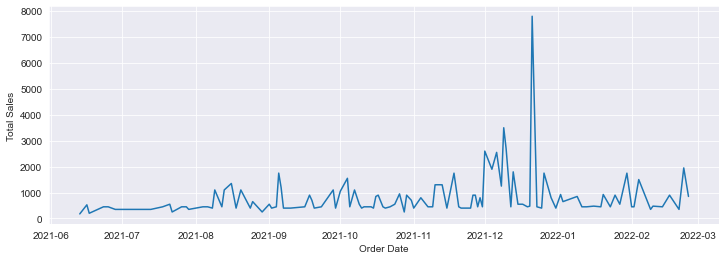

In [170]:
plt.figure(figsize=(12, 4))
sns.set_style("darkgrid")

daily = data.groupby(["order_date_formatted"])['item_total'].sum().to_frame("Total Sales").reset_index()
sns.lineplot(data=daily, x="order_date_formatted", y="Total Sales")
plt.xlabel("Order Date");

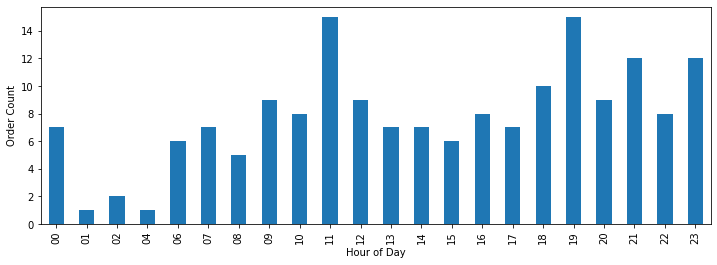

In [30]:

#
data.order_hour.value_counts().sort_index(ascending=True).plot(kind="bar", figsize=(12, 4))
plt.xlabel("Hour of Day")
plt.ylabel("Order Count");

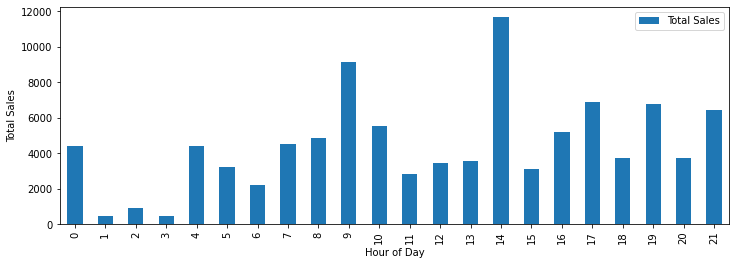

In [31]:
data.groupby(["order_hour"])["item_total"].sum().to_frame("Total Sales").reset_index().plot(kind="bar", 
                                                                                           figsize=(12, 4)),
                                                                                           
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales");

In [32]:

sales_by_state = data.groupby(['ship_state'])['item_total'].sum().to_frame("Total Sales").reset_index()
sales_by_state["rank"] = sales_by_state['Total Sales'].rank()
sales_by_state.sort_values(by='rank', ascending=False)[:5]

,ship_state,Total Sales,rank
16,MAHARASHTRA,17665.0,29.0
28,WEST BENGAL,14184.0,28.0
23,TAMIL NADU,11634.0,27.0
13,KARNATAKA,7934.0,26.0
26,UTTAR PRADESH,6038.0,25.0


In [33]:
data.head(1)

,order_date,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status,order_datetime,order_dayname,order_date_formatted,order_month,order_time_formatted,order_hour,order_minute
0,"Sun, 18 Jul, 2021, 10:38 pm IST",CHANDIGARH,CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,84.96,NaN,Delivered to buyer,"18 Jul, 2021, 10:38 pm IST",Sun,2021-07-18,July,22:38:00,22,38


In [34]:
print("Percent of total orders delivered: {:.2f}%".format( \
      data[data["order_status"]=="Delivered to buyer"].shape[0] / data.shape[0] * 100))
print("\n")
print("Percent of total orders returned: {:.2f}%".format( \
      data[data["order_status"]=="Returned to seller"].shape[0] / data.shape[0] * 100))

Percent of total orders delivered: 93.57%


Percent of total orders returned: 6.43%


In [35]:
# Is order success dependant on mode of payment?
# Sales Trend (Sales Pattern over the period)
# Which days of the week draw more sales?
# People from which states are ordering the most
# Which are the top sold products?
# What percentage of orders have been returned?
# Most popular keywords among the customers

In [40]:
data['cod'].value_counts()

Online Payment      124
Cash On Delivery     47
Name: cod, dtype: int64

In [54]:
payment_status

,cod,order_status,n_orders
0,Cash On Delivery,Delivered to buyer,42
1,Cash On Delivery,Returned to seller,5
2,Online Payment,Delivered to buyer,118
3,Online Payment,Returned to seller,6


In [56]:
payment_status = data.groupby(['cod', 'order_status']).size().to_frame('n_orders').reset_index()
payment_status

x = payment_status["n_orders"][1] / (payment_status["n_orders"][0] + payment_status["n_orders"][1]) * 100
y = payment_status["n_orders"][3] / (payment_status["n_orders"][2] + payment_status["n_orders"][3]) * 100

print(x, y)

# lower percentage of Online Payment orders are cancelled vs. paid in cash at delivery 

10.638297872340425 4.838709677419355


<AxesSubplot:xlabel='count', ylabel='order_status'>

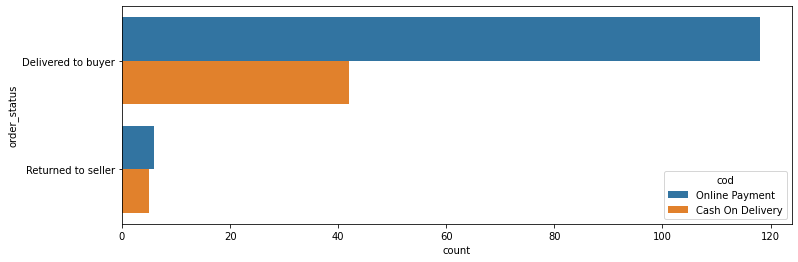

In [111]:
plt.figure(figsize=(12, 4))
sns.countplot( data = data , y = 'order_status' , hue = 'cod')

Text(-0.5, 35, 'Sales peak mid-week and again on Sunday')

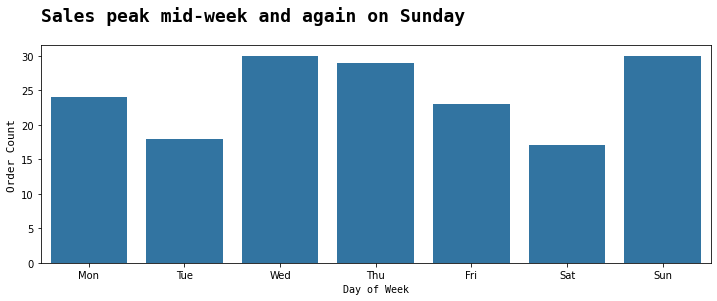

In [86]:
DOW = data.order_dayname.value_counts().reset_index().rename(columns={"index":"DOW", "order_dayname": "Order Count"})
DOW_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(data=DOW, x="DOW", y="Order Count", order=DOW_order, color='tab:blue')

plt.xlabel("Day of Week", {"fontsize":11, "font":"monospace"})
plt.ylabel("Order Count", font="monospace", fontsize=11)
ax.text(-0.5, 35, "Sales peak mid-week and again on Sunday", {"font":"monospace", "fontweight":"bold", "fontsize":18})
 

Text(0.5, 1.0, 'Top 5 Best-Selling Products')

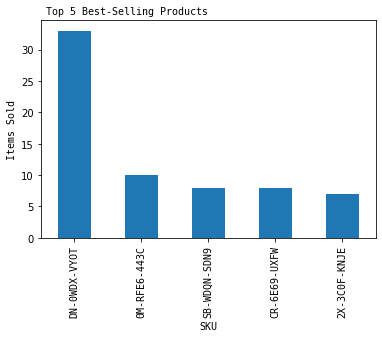

In [102]:
data['sku'] = data['sku'].apply(lambda x: x.replace("SKU:", "").strip())
data['sku'].value_counts()[:5].plot(kind="bar")
plt.xticks(font="monospace")
plt.xlabel("SKU", font="monospace")
plt.ylabel("Items Sold", font="monospace")
plt.title("Top 5 Best-Selling Products", ha="right", font="monospace")

In [159]:
data[data["order_status"]=="Returned to seller"].groupby(['sku']).size().to_frame("n_orders").sort_values(by="n_orders", ascending=False).reset_index()[:3]

,sku,n_orders
0,DN-0WDX-VYOT,3
1,3O-GBSM-TYZE,1
2,54-D265-B74K,1


Text(0.5, 1.0, 'Delivered vs. Returned Orders by SKU')

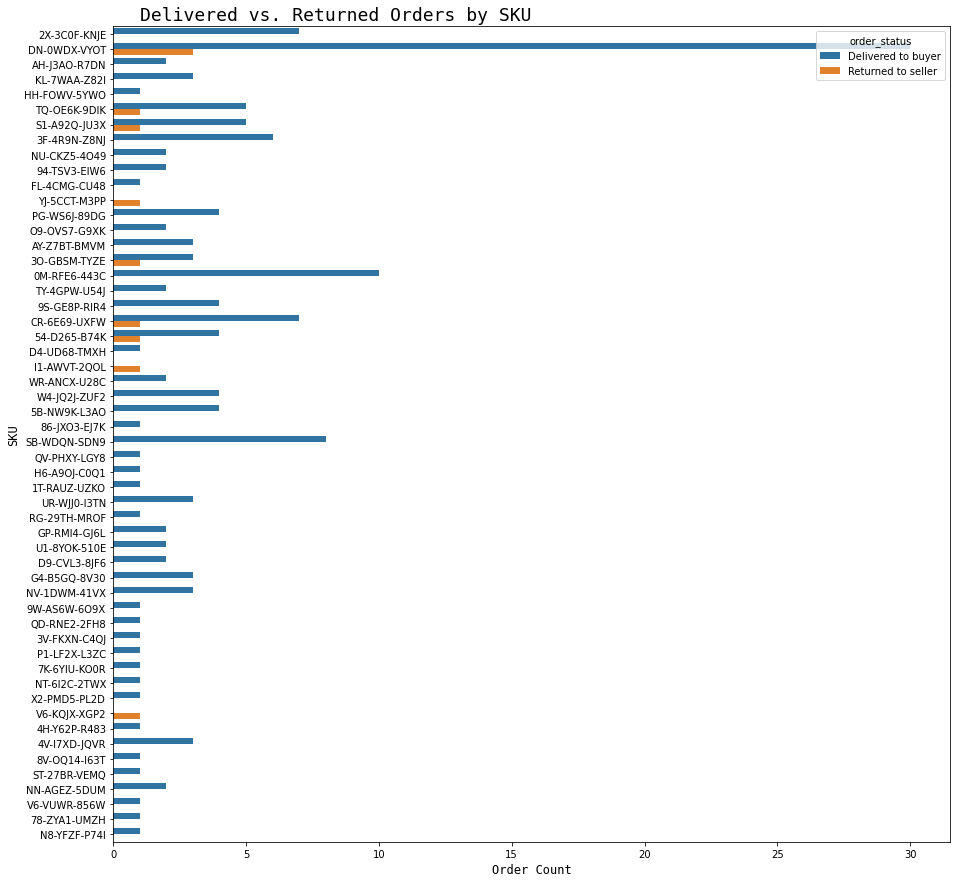

In [143]:
plt.figure(figsize=(15, 15))
sns.countplot(data=data, y=data["sku"], hue="order_status")
plt.ylabel("SKU", font="monospace", fontsize=12)
plt.xlabel("Order Count", font="monospace", fontsize=12)
plt.title("Delivered vs. Returned Orders by SKU", font="monospace", fontsize=18, ha="right")

# only one sku has been returned to seller more than once; let's look further at this SKU 


In [162]:
data[data["sku"]=="DN-0WDX-VYOT"].groupby(['order_status']).size()

order_status
Delivered to buyer    30
Returned to seller     3
dtype: int64

In [163]:
# would it be worth flagging a sku if return percentage hit a certain point; or notifying seller 

0.09090909090909091

##### LOGITSITC REGRESSION ANALYSIS

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [164]:
# can we accurately predict if an order will be cancelled 

Feature Engineering

In [165]:
reg = data.copy()
for col in reg.columns: 
    if reg[col].nunique() == 2: 
        print("*****", col, ": ", reg[col].nunique())
    else:
        print(col, ": ", reg[col].nunique())

order_date :  171
ship_city :  80
ship_state :  29
sku :  54
description :  61
quantity :  4
item_total :  18
shipping_fee :  13
***** cod :  2
***** order_status :  2
order_datetime :  171
order_dayname :  7
order_date_formatted :  117
order_month :  9
order_time_formatted :  154
order_hour :  22
order_minute :  58


In [118]:
# reg.drop(labels=["order_date"], axis=1, inplace=True)

In [127]:
# imputing to binary variables 
reg['cod'] = np.where(reg['cod']=="Online Payment", 1, 0)
reg['order_status'] = np.where(reg["order_status"]=="Delivered to buyer", 1, 0)

In [129]:
reg.drop(columns=["order_date", "order_datetime"], inplace=True)

In [138]:
from sklearn.preprocessing import OrdinalEncoder

features = ["quantity", "item_total", "shipping_fee", "order_hour", "ship_state", "sku", "order_month"]

encoder = OrdinalEncoder() 
result = encoder.fit_transform(features)


ValueError: Expected 2D array, got 1D array instead:
array=['quantity' 'item_total' 'shipping_fee' 'order_hour' 'ship_state' 'sku'
 'order_month'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [133]:
features = ["quantity", "item_total", "shipping_fee", "order_hour", "ship_state", "sku", "order_month"

Y = reg["order_status"]

SyntaxError: invalid syntax (Temp/ipykernel_23016/498763474.py, line 3)

In [ ]:
features = ['ship_city']

In [ ]:
features_interest = ['ship_city', 'ship_state' , 'quantity', 'item_total', 'shipping_fee', 'cod',
       'order_status']